# Flight Price Prediction

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
filepath = 'M:/MVG/Courses/Flight_Price_Prediction/Flight_Dataset.csv'
df = pd.read_csv(filepath)

print(f"Loaded dataset: {filepath}")
print(f"Rows: {df.shape[0]}")
print(f"Columns: {df.shape[1]}")
print(df.head())

Loaded dataset: M:/MVG/Courses/Flight_Price_Prediction/Flight_Dataset.csv
Rows: 300153
Columns: 12
   Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2           2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3           3   Vistara   UK-995       Delhi        Morning  zero   
4           4   Vistara   UK-963       Delhi        Morning  zero   

    arrival_time destination_city    class  duration  days_left  price  
0          Night           Mumbai  Economy      2.17          1   5953  
1        Morning           Mumbai  Economy      2.33          1   5953  
2  Early_Morning           Mumbai  Economy      2.17          1   5956  
3      Afternoon           Mumbai  Economy      2.25          1   5955  
4        Morning           Mumbai  Economy      2.33          1   5955  


# Preprocessing

In [3]:
df = df.drop('Unnamed: 0', axis=1)
print(f"Columns: {df.columns}")
df.info()

Columns: Index(['airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [4]:
# Missing Values
missing = df.isnull().sum()
if missing.sum() > 0:
    print("Missing values in each column:")
    print(missing[missing > 0])
else:
    print("No missing values found.")

No missing values found.


Target variable statistics:
count    300153.000000
mean      20889.660523
std       22697.767366
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64


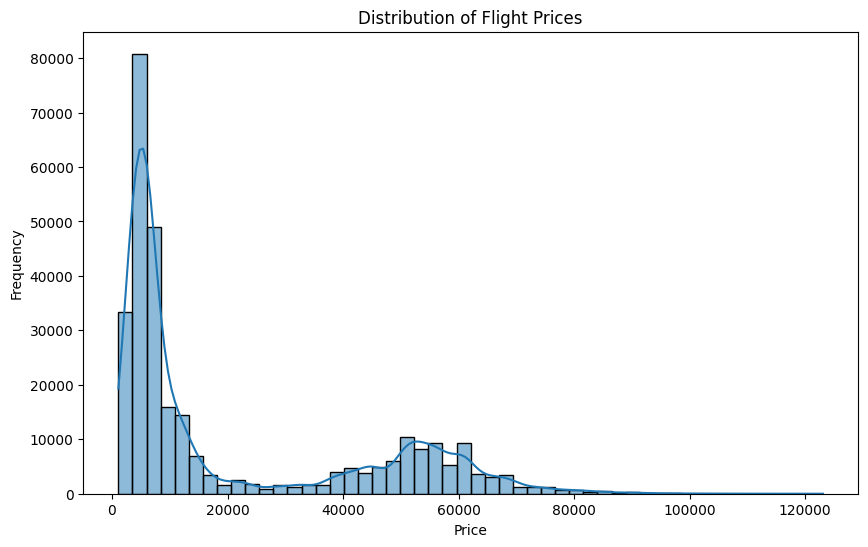

In [5]:
# Target Variable
print("Target variable statistics:")
print(df['price'].describe())
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [6]:
# Data Preprocessing
print("Ordinal Encoding of Stops")

df['stops'] = df['stops'].map({'zero': 0, 'one': 1, 'two_or_more': 2})
print(df['stops'].value_counts())

df['class'] = df['class'].map({'Economy': 0, 'Business': 1})
print(df['class'].value_counts())

Ordinal Encoding of Stops
stops
1    250863
0     36004
2     13286
Name: count, dtype: int64
class
0    206666
1     93487
Name: count, dtype: int64


In [7]:
# Feature Selection
X = df.drop(['price', 'flight'], axis=1) # Features
y = df[['price']] # Target variable
print(X.head())

    airline source_city departure_time  stops   arrival_time destination_city  \
0  SpiceJet       Delhi        Evening      0          Night           Mumbai   
1  SpiceJet       Delhi  Early_Morning      0        Morning           Mumbai   
2   AirAsia       Delhi  Early_Morning      0  Early_Morning           Mumbai   
3   Vistara       Delhi        Morning      0      Afternoon           Mumbai   
4   Vistara       Delhi        Morning      0        Morning           Mumbai   

   class  duration  days_left  
0      0      2.17          1  
1      0      2.33          1  
2      0      2.17          1  
3      0      2.25          1  
4      0      2.33          1  


In [8]:
# One-Hot Encoding of Categorical Variables
print("One-Hot Encoding of Categorical Variables")

categorical_cols = ['airline', 'source_city', 'destination_city', 'departure_time', 'arrival_time']
X_encode = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
print(X_encode.head())
print(f"Shape after encoding: {X_encode.shape[1]}")

One-Hot Encoding of Categorical Variables
   stops  class  duration  days_left  airline_Air_India  airline_GO_FIRST  \
0      0      0      2.17          1              False             False   
1      0      0      2.33          1              False             False   
2      0      0      2.17          1              False             False   
3      0      0      2.25          1              False             False   
4      0      0      2.33          1              False             False   

   airline_Indigo  airline_SpiceJet  airline_Vistara  source_city_Chennai  \
0           False              True            False                False   
1           False              True            False                False   
2           False             False            False                False   
3           False             False             True                False   
4           False             False             True                False   

   ...  departure_time_Early_Mor

In [9]:
# Normalization
from sklearn.preprocessing import MinMaxScaler

print("Normalizing Numerical Features (0-1 scale)")
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

X_scaled = pd.DataFrame(scaler_X.fit_transform(X_encode), columns=X_encode.columns)
y_scaled = pd.DataFrame(scaler_y.fit_transform(y), columns=['price'])

print(f"Final feature count: {X_scaled.shape[1]}")
print(f"Samples: {X_scaled.shape[0]}")

Normalizing Numerical Features (0-1 scale)
Final feature count: 29
Samples: 300153


In [10]:
# Train-Test split
from sklearn.model_selection import train_test_split

print("Splitting data into training and testing sets (80-20 split)")
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

Splitting data into training and testing sets (80-20 split)
Training samples: 240122
Testing samples: 60031


# Model Training and Evaluation

In [12]:
# Linear Regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

print("Linear Regression Model")

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Prediction
y_train_pred_lr = lr_model.predict(X_train)
y_test_pred_lr = lr_model.predict(X_test)

# Metrices
r2_train_lr = r2_score(y_train, y_train_pred_lr)
r2_test_lr = r2_score(y_test, y_test_pred_lr)
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))

# Convert back to original scale
y_test_original = scaler_y.inverse_transform(y_test)
y_test_pred_lr_original = scaler_y.inverse_transform(y_test_pred_lr.reshape(-1, 1))
y_test_rmse = np.sqrt(mean_squared_error(y_test_original, y_test_pred_lr_original))

print(f"Linear Regression R² (Train): {r2_train_lr:.4f}")
print(f"Linear Regression R² (Test): {r2_test_lr:.4f}")
print(f"Linear Regression RMSE (Train): {rmse_train_lr:.4f}")
print(f"Linear Regression RMSE (Test): {rmse_test_lr:.4f}")
print(f"Linear Regression RMSE (Test, original scale): {y_test_rmse:.4f}")

Linear Regression Model
Linear Regression R² (Train): 0.9100
Linear Regression R² (Test): 0.9099
Linear Regression RMSE (Train): 0.0558
Linear Regression RMSE (Test): 0.0559
Linear Regression RMSE (Test, original scale): 6814.9356


In [13]:
# Ridge Regression

from sklearn.linear_model import Ridge

print("Ridge Regression Model")

ridge_model = Ridge(alpha=1.0, random_state=42)
ridge_model.fit(X_train, y_train)

# Prediction
y_train_pred_ridge = ridge_model.predict(X_train)
y_test_pred_ridge = ridge_model.predict(X_test)

# Metrices
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)
rmse_train_ridge = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))
rmse_test_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))

# Convert back to original scale
y_test_pred_ridge_original = scaler_y.inverse_transform(y_test_pred_ridge.reshape(-1, 1))
y_test_rmse_ridge = np.sqrt(mean_squared_error(y_test_original, y_test_pred_ridge_original))

print(f"Ridge Regression R² (Train): {r2_train_ridge:.4f}")
print(f"Ridge Regression R² (Test): {r2_test_ridge:.4f}")
print(f"Ridge Regression RMSE (Train): {rmse_train_ridge:.4f}")
print(f"Ridge Regression RMSE (Test): {rmse_test_ridge:.4f}")
print(f"Ridge Regression RMSE (Test, original scale): {y_test_rmse_ridge:.4f}")

Ridge Regression Model
Ridge Regression R² (Train): 0.9100
Ridge Regression R² (Test): 0.9099
Ridge Regression RMSE (Train): 0.0558
Ridge Regression RMSE (Test): 0.0559
Ridge Regression RMSE (Test, original scale): 6814.9340


In [14]:
# Lasso Regression

from sklearn.linear_model import Lasso

print("Lasso Regression Model")

lasso_model = Lasso(alpha=0.01, random_state=42)
lasso_model.fit(X_train, y_train)

# Prediction
y_train_pred_lasso = lasso_model.predict(X_train)
y_test_pred_lasso = lasso_model.predict(X_test)

# Metrices
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)
rmse_train_lasso = np.sqrt(mean_squared_error(y_train, y_train_pred_lasso))
rmse_test_lasso = np.sqrt(mean_squared_error(y_test, y_test_pred_lasso))

# Convert back to original scale
y_test_pred_lasso_original = scaler_y.inverse_transform(y_test_pred_lasso.reshape(-1, 1))
y_test_rmse_lasso = np.sqrt(mean_squared_error(y_test_original, y_test_pred_lasso_original))

print(f"Lasso Regression R² (Train): {r2_train_lasso:.4f}")
print(f"Lasso Regression R² (Test): {r2_test_lasso:.4f}")
print(f"Lasso Regression RMSE (Train): {rmse_train_lasso:.4f}")
print(f"Lasso Regression RMSE (Test): {rmse_test_lasso:.4f}")
print(f"Lasso Regression RMSE (Test, original scale): {y_test_rmse_lasso:.4f}")

Lasso Regression Model
Lasso Regression R² (Train): 0.8666
Lasso Regression R² (Test): 0.8671
Lasso Regression RMSE (Train): 0.0680
Lasso Regression RMSE (Test): 0.0679
Lasso Regression RMSE (Test, original scale): 8276.5319


In [15]:
# Elastic Net Regression

from sklearn.linear_model import ElasticNet

print("Elastic Net Regression Model")

elastic_net_model = ElasticNet(alpha=0.01, l1_ratio=0.5, random_state=42)
elastic_net_model.fit(X_train, y_train)

# Prediction
y_train_pred_enet = elastic_net_model.predict(X_train)
y_test_pred_enet = elastic_net_model.predict(X_test)

# Metrices
r2_train_enet = r2_score(y_train, y_train_pred_enet)
r2_test_enet = r2_score(y_test, y_test_pred_enet)
rmse_train_enet = np.sqrt(mean_squared_error(y_train, y_train_pred_enet))
rmse_test_enet = np.sqrt(mean_squared_error(y_test, y_test_pred_enet))

# Convert back to original scale
y_test_pred_enet_original = scaler_y.inverse_transform(y_test_pred_enet.reshape(-1, 1))
y_test_rmse_enet = np.sqrt(mean_squared_error(y_test_original, y_test_pred_enet_original))

print(f"Elastic Net Regression R² (Train): {r2_train_enet:.4f}")
print(f"Elastic Net Regression R² (Test): {r2_test_enet:.4f}")
print(f"Elastic Net Regression RMSE (Train): {rmse_train_enet:.4f}")
print(f"Elastic Net Regression RMSE (Test): {rmse_test_enet:.4f}")
print(f"Elastic Net Regression RMSE (Test, original scale): {y_test_rmse_enet:.4f}")

Elastic Net Regression Model
Elastic Net Regression R² (Train): 0.8789
Elastic Net Regression R² (Test): 0.8794
Elastic Net Regression RMSE (Train): 0.0648
Elastic Net Regression RMSE (Test): 0.0646
Elastic Net Regression RMSE (Test, original scale): 7883.4548


In [16]:
# Decision Tree Regression

from sklearn.tree import DecisionTreeRegressor

print("Decision Tree Regression Model")

dt_model = DecisionTreeRegressor(max_depth = 15, min_samples_split=10, random_state=42)
dt_model.fit(X_train, y_train)

# Prediction
y_train_pred_dt = dt_model.predict(X_train)
y_test_pred_dt = dt_model.predict(X_test)

# Metrices
r2_train_dt = r2_score(y_train, y_train_pred_dt)
r2_test_dt = r2_score(y_test, y_test_pred_dt)
rmse_train_dt = np.sqrt(mean_squared_error(y_train, y_train_pred_dt))
rmse_test_dt = np.sqrt(mean_squared_error(y_test, y_test_pred_dt))

# Convert back to original scale
y_test_pred_dt_original = scaler_y.inverse_transform(y_test_pred_dt.reshape(-1, 1))
y_test_rmse_dt = np.sqrt(mean_squared_error(y_test_original, y_test_pred_dt_original))

print(f"Decision Tree Regression R² (Train): {r2_train_dt:.4f}")
print(f"Decision Tree Regression R² (Test): {r2_test_dt:.4f}")
print(f"Decision Tree Regression RMSE (Train): {rmse_train_dt:.4f}")
print(f"Decision Tree Regression RMSE (Test): {rmse_test_dt:.4f}")
print(f"Decision Tree Regression RMSE (Test, original scale): {y_test_rmse_dt:.4f}")

Decision Tree Regression Model
Decision Tree Regression R² (Train): 0.9770
Decision Tree Regression R² (Test): 0.9718
Decision Tree Regression RMSE (Train): 0.0282
Decision Tree Regression RMSE (Test): 0.0313
Decision Tree Regression RMSE (Test, original scale): 3811.6507


In [17]:
# Random Forest Regression

from sklearn.ensemble import RandomForestRegressor

print("Random Forest Regression Model")

rf_model = RandomForestRegressor(n_estimators=100, 
                                 max_depth=15, 
                                 min_samples_split=5, 
                                 random_state=42)
rf_model.fit(X_train, y_train)

# Prediction
y_train_pred_rf = rf_model.predict(X_train)
y_test_pred_rf = rf_model.predict(X_test)

# Metrices
r2_train_rf = r2_score(y_train, y_train_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))

# Convert back to original scale
y_test_pred_rf_original = scaler_y.inverse_transform(y_test_pred_rf.reshape(-1, 1))
y_test_rmse_rf = np.sqrt(mean_squared_error(y_test_original, y_test_pred_rf_original))

print(f"Random Forest Regression R² (Train): {r2_train_rf:.4f}")
print(f"Random Forest Regression R² (Test): {r2_test_rf:.4f}")
print(f"Random Forest Regression RMSE (Train): {rmse_train_rf:.4f}")
print(f"Random Forest Regression RMSE (Test): {rmse_test_rf:.4f}")
print(f"Random Forest Regression RMSE (Test, original scale): {y_test_rmse_rf:.4f}")

Random Forest Regression Model
Random Forest Regression R² (Train): 0.9804
Random Forest Regression R² (Test): 0.9763
Random Forest Regression RMSE (Train): 0.0261
Random Forest Regression RMSE (Test): 0.0287
Random Forest Regression RMSE (Test, original scale): 3495.4627


In [18]:
# AdaBoost Regression

from sklearn.ensemble import AdaBoostRegressor

print("AdaBoost Regression Model")

adb_model = AdaBoostRegressor(n_estimators=100, 
                              learning_rate=0.1,
                              random_state=42)
adb_model.fit(X_train, y_train)

# Prediction
y_train_pred_adb = adb_model.predict(X_train)
y_test_pred_adb = adb_model.predict(X_test)

# Metrices
r2_train_adb = r2_score(y_train, y_train_pred_adb)
r2_test_adb = r2_score(y_test, y_test_pred_adb)
rmse_train_adb = np.sqrt(mean_squared_error(y_train, y_train_pred_adb))
rmse_test_adb = np.sqrt(mean_squared_error(y_test, y_test_pred_adb))

# Convert back to original scale
y_test_pred_adb_original = scaler_y.inverse_transform(y_test_pred_adb.reshape(-1, 1))
y_test_rmse_adb = np.sqrt(mean_squared_error(y_test_original, y_test_pred_adb_original))

print(f"AdaBoost Regression R² (Train): {r2_train_adb:.4f}")
print(f"AdaBoost Regression R² (Test): {r2_test_adb:.4f}")
print(f"AdaBoost Regression RMSE (Train): {rmse_train_adb:.4f}")
print(f"AdaBoost Regression RMSE (Test): {rmse_test_adb:.4f}")
print(f"AdaBoost Regression RMSE (Test, original scale): {y_test_rmse_adb:.4f}")

AdaBoost Regression Model
AdaBoost Regression R² (Train): 0.9361
AdaBoost Regression R² (Test): 0.9352
AdaBoost Regression RMSE (Train): 0.0470
AdaBoost Regression RMSE (Test): 0.0474
AdaBoost Regression RMSE (Test, original scale): 5781.3831


# Model Results Comparison

In [27]:
print("All Models Comparison")

results = pd.DataFrame({
    'Model' : [
        'Linear Regression',
        'Ridge',
        'Lasso',
        'ElasticNet',
        'Decision Tree',
        'Random Forest',
        'AdaBoost'
    ],
        'Train R²': [
        r2_train_lr, r2_train_ridge, r2_train_lasso, r2_train_enet,
        r2_train_dt, r2_train_rf, r2_train_adb
    ],
    'Test R²': [
        r2_test_lr, r2_test_ridge, r2_test_lasso, r2_test_enet,
        r2_test_dt, r2_test_rf, r2_test_adb
    ],
    'Train RMSE': [
        rmse_train_lr, rmse_train_ridge, rmse_train_lasso, rmse_train_enet,
        rmse_train_dt, rmse_train_rf, rmse_train_adb
    ],
    'Test RMSE': [
        rmse_test_lr, rmse_test_ridge, rmse_test_lasso, rmse_test_enet,
        rmse_test_dt, rmse_test_rf, rmse_test_adb
    ],
    'Real RMSE': [
        y_test_rmse, y_test_rmse_ridge, y_test_rmse_lasso, y_test_rmse_enet,
        y_test_rmse_dt, y_test_rmse_rf, y_test_rmse_adb
    ]
})

results = results.sort_values('Test R²', ascending=False)

print("\n")
print(results.to_string(index=False))

# Best model
best_model = results.iloc[0]
print(f"\nBEST MODEL: {best_model['Model']}")
print(f"  Test R² Score:  {best_model['Test R²']:.4f} ({best_model['Test R²']*100:.2f}% variance explained)")
print(f"  Test RMSE:      {best_model['Test RMSE']:.4f} (normalized)")
print(f"  Real RMSE:      ₹{best_model['Real RMSE']:,.2f}")

All Models Comparison


            Model  Train R²  Test R²  Train RMSE  Test RMSE   Real RMSE
    Random Forest  0.980384 0.976297    0.026063   0.028659 3495.462677
    Decision Tree  0.977013 0.971815    0.028213   0.031252 3811.650692
         AdaBoost  0.936081 0.935159    0.047047   0.047402 5781.383058
            Ridge  0.909998 0.909903    0.055826   0.055876 6814.933967
Linear Regression  0.909998 0.909903    0.055826   0.055876 6814.935635
       ElasticNet  0.878914 0.879436    0.064753   0.064636 7883.454841
            Lasso  0.866636 0.867113    0.067957   0.067859 8276.531919

BEST MODEL: Random Forest
  Test R² Score:  0.9763 (97.63% variance explained)
  Test RMSE:      0.0287 (normalized)
  Real RMSE:      ₹3,495.46


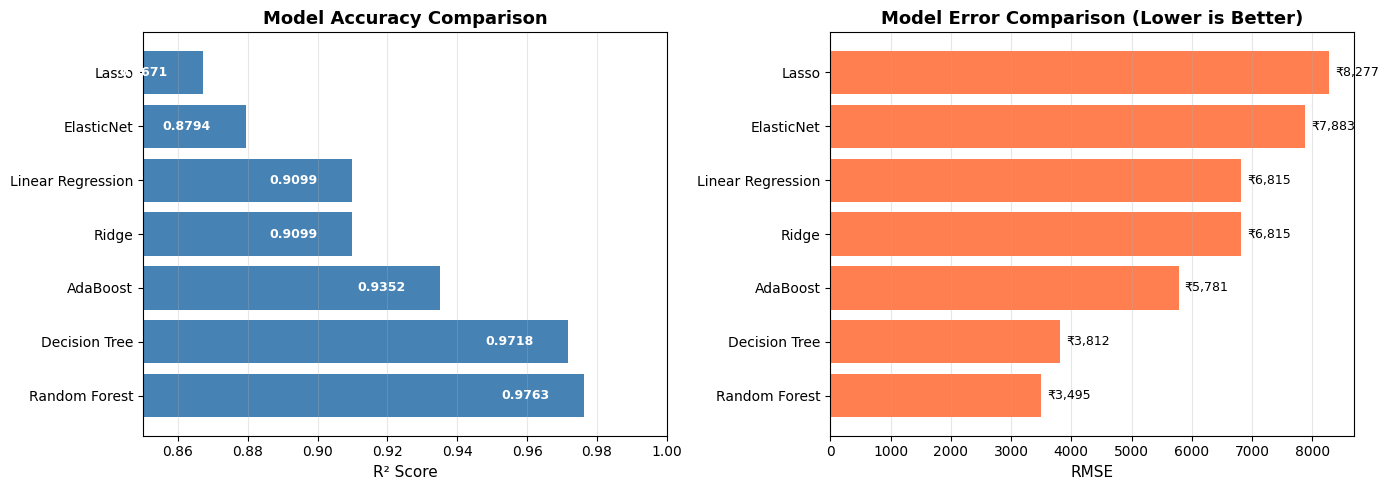

Best Model: Random Forest
R² = 0.9763 | RMSE = ₹3,495.46


In [30]:
# Simple Visulaization of Results

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: R² Score Comparison
models = results['Model'].tolist()
r2_scores = results['Test R²'].tolist()

axes[0].barh(models, r2_scores, color='steelblue')
axes[0].set_xlabel('R² Score', fontsize=11)
axes[0].set_title('Model Accuracy Comparison', fontsize=13, fontweight='bold')
axes[0].set_xlim([0.85, 1.0])
axes[0].grid(axis='x', alpha=0.3)

# Add values on bars
for i, v in enumerate(r2_scores):
    axes[0].text(v - 0.01, i, f'{v:.4f}', va='center', ha='right', 
                 color='white', fontweight='bold', fontsize=9)

# Plot 2: RMSE Comparison (Real ₹)
rmse_values = results['Real RMSE'].tolist()

axes[1].barh(models, rmse_values, color='coral')
axes[1].set_xlabel('RMSE', fontsize=11)
axes[1].set_title('Model Error Comparison (Lower is Better)', fontsize=13, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)

# Add values on bars
for i, v in enumerate(rmse_values):
    axes[1].text(v + 100, i, f'₹{v:,.0f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()

print(f"Best Model: {results.iloc[0]['Model']}")
print(f"R² = {results.iloc[0]['Test R²']:.4f} | RMSE = ₹{results.iloc[0]['Real RMSE']:,.2f}")